<a href="https://colab.research.google.com/github/samibahig/RecoverProject/blob/main/RidgeMetabolomique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Pour Thibault, ici je nettoie les données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import sklearn
import os
plt.style.use('ggplot')
#print('\nMETADATA :')
data_path = ''
metadata_filename = data_path + '/content/metadata.csv'
meta_df = pd.read_csv(metadata_filename)
#print(meta_df.columns)
meta_df.columns = ['#', 'plate', '-', 'symptoms'] + list(meta_df)[4:]
#print(meta_df.columns)
#print('available metadata :', list(meta_df))
meta_idx = meta_df['ID'].to_list()
meta_label = meta_df['symptoms'].to_list()
#print('------------------')
#print(list(zip(meta_idx, meta_label)))
#print('------------------')
meta_id_label_dict = {str(k): 1 if v=='S' else 0 for k, v in zip(meta_idx, meta_label)}
data_path = ''
print('\nMETABOLOMICS DATA :')
metabolomics_data_filename = data_path + '/content/metabolomics.csv'
feat_df = pd.read_csv(metabolomics_data_filename, index_col=0, skiprows=[0], dtype=str, usecols=[0])
features = list(feat_df.index.values)
print('# of features : ', len(features))
print('first feature :', features[0])
print('last feature :', features[-1])
col_list = ["Group"]
column1 = pd.read_csv(metabolomics_data_filename, usecols=col_list)
print('----------')
column1 = column1['Group'].to_list()
print(column1[1:])

print('----------')
idx_df = pd.read_csv(metabolomics_data_filename, header=1, nrows=1, encoding='unicode_escape')
print(idx_df)
idx = list(idx_df)[1:]
idx = [l[17:22] for l in idx]
labels_df = pd.read_csv(metabolomics_data_filename, nrows=1)
labels = list(labels_df)[1:]
print('# of labels : ', len(labels))

cols_df = pd.read_csv(metabolomics_data_filename, header=1, nrows=1, encoding='unicode_escape')
cols_list = list(cols_df)

df3 = pd.read_csv(metabolomics_data_filename, header=1, na_values=['#DIV/0!'], usecols=cols_list[1:], encoding='unicode_escape')
df3 = df3.T
df3['idx'] = idx
df3.set_index('idx', inplace=True)
df3.columns = features
df3 = df3.dropna(axis=1)

#clean data of samples that are not in metadata :
idx = df3.index.values
y = []
for k in range(len(idx)):
    id = idx[k]
    if id in meta_id_label_dict:
        y.append(meta_id_label_dict[id])
    else:
        # we will not put this sample in the dataset
        #print('sample to remove because of unknown label:', k, id)
        y.append('to_remove')
df3['label'] = y
df3 = df3[df3.label != 'to_remove']

#create X and y matrices for ML :
y = list(df3['label'])
print(y)
del df3['label']
X = df3.to_numpy()

print('metabolomics data :')
print('# of samples : ', df3.shape[0])
print('# of features : ', df3.shape[1])
print('labels:', list(dict.fromkeys(y)))


METABOLOMICS DATA :
# of features :  1930
first feature : 3.15_160.1695m/z
last feature : 4.73_488.1759n
----------
['3.15_160.1695m/z', '8.56_366.6297m/z', '6.52_828.4067n', '7.23_281.0516m/z', '8.34_429.0893m/z', '4.55_252.0298m/z', '4.56_234.0194m/z', '4.55_220.0590m/z', '5.19_386.0794m/z', '8.56_367.6297m/z', '4.55_337.0498n', '7.68_358.3671m/z', '5.07_371.2588m/z', '5.87_393.0866m/z', '8.34_485.1126m/z', '8.34_445.1197m/z', '4.04_133.0143m/z', '7.68_355.0720m/z', '8.87_519.1391m/z', '4.54_352.0727m/z', '8.34_248.0596m/z', '8.34_355.0706m/z', '5.19_370.2564m/z', '4.78_354.0894m/z', '7.68_371.1045m/z', '9.58_445.1201m/z', '7.68_281.0517m/z', '8.34_281.0516m/z', '8.34_371.1021m/z', '3.24_268.0614m/z', '5.28_429.2386m/z', '7.68_248.0590m/z', '4.04_151.0293m/z', '4.08_284.0562m/z', '8.87_206.0254n', '8.38_207.0326m/z', '6.52_414.2042n', '8.34_223.0674m/z', '4.60_368.0878m/z', '8.87_559.1315m/z', '7.68_190.0325n', '7.68_411.1100m/z', '6.52_119.0859m/z', '5.87_449.1529m/z', '8.87_355.07

In [2]:
### Ici entrainement du modèle Ridge avec alpha=1.0
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import numpy as np
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.57981e-17): result may not be accurate.
  overwrite_a=False)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
### Ici les prédictions sont calculées  sauf que je n'arrive pas à calculer l'accuracy?  As tu des hints? Merci 
from sklearn.metrics import accuracy_score
from sklearn import metrics
predictions = clf.predict(X_test)
predictions
print("Test Accuracy:", metrics.accuracy_score(y_test, predictions))

ValueError: ignored

In [4]:
### Ici calcul les coefficients. 
w = clf.coef_
w

array([ 0.00000000e+00,  0.00000000e+00,  8.23820934e-15, ...,
        2.22169118e-09, -1.52394526e-09,  5.99625244e-10])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.57981e-17): result may not be accurate.
  overwrite_a=False)


 ...]

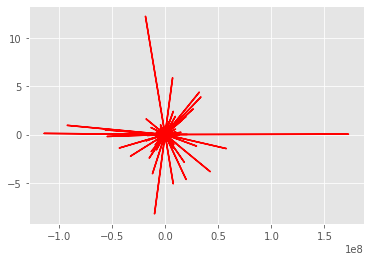

In [7]:
### Ici je tente de faire un graphe mais quel graphe ça donne! ou est l'erreur?
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)
#w = rr.coef_[0]
#plt.scatter(X_train, y_train)
plt.plot(X, w*X, c='red')

In [ ]:
clf.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}